In [ ]:
!pip install langchain langchain_core langgraph langchain_community langchain_groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain_core
    F

In [ ]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph, END
from langchain.prompts import ChatPromptTemplate
import tempfile
import random

##1 . State Definition


In [ ]:
class MusicState(TypedDict):
  musician_input: str
  melody: str
  harmony: str
  rhythm: str
  style: str
  composition: str
  midi_file: str

##2 . LLM Initialization

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    temperature = 0,
    groq_api_key = "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",
    model_name = "llama-3.3-70b-versatile"
)

result = llm.invoke("What is music?")

In [ ]:
result.content

'Music is a universal language that has been a part of human culture for thousands of years. It is a form of artistic expression that uses sound and silence to convey emotions, ideas, and experiences. Music can be defined in various ways, but here are some key aspects that help to understand what music is:\n\n1. **Sound and Silence**: Music is composed of sounds, which can be produced by various instruments, voices, or electronic devices. These sounds can be organized in a specific pattern, rhythm, and melody to create a musical composition. Silence, or the absence of sound, also plays a crucial role in music, as it can be used to create contrast, emphasize certain sounds, or add emotional depth.\n2. **Melody, Harmony, and Rhythm**: Music typically consists of three main elements: melody (the succession of pitches), harmony (the combination of multiple pitches sounding simultaneously), and rhythm (the pattern of duration and accentuation of sounds). These elements work together to crea

##3 . Musical Node Functions


In [ ]:
def melody_generator(state: MusicState) -> Dict:
  prompt = ChatPromptTemplate.from_template(
      "Generate a melody based on this input: {input}. Represent it as a string of notes in music21 format"
  )
  chain = prompt | llm
  melody = chain.invoke({"input": state["musician_input"]})
  return {"melody":melody.content}

def harmony_creator(state: MusicState) -> Dict:
  prompt = ChatPromptTemplate.from_template(
      "Create harmony for this melody: {melody}. Represent it as a string of chords in music21 format"
  )
  chain = prompt | llm
  harmony = chain.invoke({"melody": state["melody"]})
  return {"harmony":harmony.content}

def rhythm_analyzer(state: MusicState) -> Dict:
  prompt = ChatPromptTemplate.from_template(
      "Analyze and suggest a rhythm for this melody and harmony: {melody},{harmony}. Represent it as a string of duration in music21 format"
  )
  chain = prompt | llm
  rhythm = chain.invoke({"melody": state["melody"], "harmony": state["harmony"]})
  return {"rhythm":rhythm.content}

def style_adapter(state: MusicState)->Dict:
  prompt = ChatPromptTemplate.from_template(
      "Adapt this composition to the {style} style: Melody: {melody}, Harmony: {harmony}, Rhythm: {rhythm}. Provide the result in music21 format"
  )
  chain = prompt | llm
  adapted = chain.invoke(
      {
          "style": state["style"],
          "melody" : state["melody"],
          "harmony":state["harmony"],
          "rhythm":state["rhythm"]
      }
  )
  return {"composition": adapted.content}

In [ ]:
pip install music21

##4 . MIDI Converter

In [ ]:
import music21
def midi_converter(state: MusicState)->Dict:
  piece = music21.stream.Score()
  description = music21.expressions.TextExpression(state["composition"])
  piece.append(description)

  scales = {
        'C major': ['C', 'D', 'E', 'F', 'G', 'A', 'B'],
        'C minor': ['C', 'D', 'Eb', 'F', 'G', 'Ab', 'Bb'],
        'C harmonic minor': ['C', 'D', 'Eb', 'F', 'G', 'Ab', 'B'],
        'C melodic minor': ['C', 'D', 'Eb', 'F', 'G', 'A', 'B'],
        'C dorian': ['C', 'D', 'Eb', 'F', 'G', 'A', 'Bb'],
        'C phrygian': ['C', 'Db', 'Eb', 'F', 'G', 'Ab', 'Bb'],
        'C lydian': ['C', 'D', 'E', 'F#', 'G', 'A', 'B'],
        'C mixolydian': ['C', 'D', 'E', 'F', 'G', 'A', 'Bb'],
        'C locrian': ['C', 'Db', 'Eb', 'F', 'Gb', 'Ab', 'Bb'],
        'C whole tone': ['C', 'D', 'E', 'F#', 'G#', 'A#'],
        'C diminished': ['C', 'D', 'Eb', 'F', 'Gb', 'Ab', 'A', 'B'],
    }

  chords = {
        'C major': ['C4', 'E4', 'G4'],
        'C minor': ['C4', 'Eb4', 'G4'],
        'C diminished': ['C4', 'Eb4', 'Gb4'],
        'C augmented': ['C4', 'E4', 'G#4'],
        'C dominant 7th': ['C4', 'E4', 'G4', 'Bb4'],
        'C major 7th': ['C4', 'E4', 'G4', 'B4'],
        'C minor 7th': ['C4', 'Eb4', 'G4', 'Bb4'],
        'C half-diminished 7th': ['C4', 'Eb4', 'Gb4', 'Bb4'],
        'C fully diminished 7th': ['C4', 'Eb4', 'Gb4', 'A4'],
    }

  def create_melody(scale_name, duration):
    melody = music21.stream.Part()
    scale = scales[scale_name]
    for i in range(duration):
      note = music21.note.Note(random.choice(scale) + '4')
      note.quarterLength = 1
      melody.append(note)
    return melody

  def create_chord_progression(duration):
    harmony = music21.stream.Part()
    for i in range(duration):
      chord_name = random.choice(list(chords.keys()))
      chord = music21.chord.Chord(chords[chord_name])
      chord.quarterLength = 1
      harmony.append(chord)
    return harmony

  user_input = state["musician_input"].lower()

  if 'minor' in user_input:
    scale_name = 'C minor'
  elif 'major' in user_input:
    scale_name = 'C major'
  else:
    scale_name = random.choice(list(scales.keys()))

  melody = create_melody(scale_name, 10)
  harmony = create_chord_progression(10)

  final_note = music21.note.Note(scales[scale_name][0] + '4')
  final_note.quarterLength = 1
  melody.append(final_note)

  final_chords = music21.chord.Chord(chords[scale_name.split()[0] + ' ' + scale_name.split()[1]])
  final_chords.quarterLength = 1
  harmony.append(final_chords)

  piece.append(melody)
  piece.append(harmony)

  piece.insert(0, music21.tempo.MetronomeMark(number = 60))

  with tempfile.NamedTemporaryFile(delete =False, suffix=".mid") as temp_midi:
    piece.write('midi', temp_midi.name)
  return {"midi_file": temp_midi.name}


##5 . Lang Workflow

In [ ]:
workflow = StateGraph(MusicState)

workflow.add_node("melody_generator", melody_generator)
workflow.add_node("harmony_creator", harmony_creator)
workflow.add_node("rhythm_analyzer", rhythm_analyzer)
workflow.add_node("style_adapter", style_adapter)
workflow.add_node("midi_converter", midi_converter)

workflow.set_entry_point("melody_generator")

workflow.add_edge("melody_generator", "harmony_creator")
workflow.add_edge("harmony_creator", "rhythm_analyzer")
workflow.add_edge("rhythm_analyzer", "style_adapter")
workflow.add_edge("style_adapter", "midi_converter")
workflow.add_edge("midi_converter", END)

app = workflow.compile()

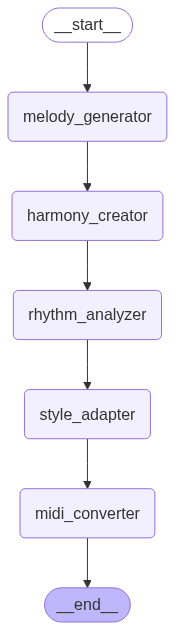

In [ ]:
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

##6 . Run the Workflow

In [ ]:
inputs = {
    "musician_input": "Write a sorrowful string quartet in C minor",
    "style": "Romantic era"

}

result = app.invoke(inputs)
print(f"MIDI File saved in {result['midi_file']}")

MIDI File saved in /tmp/tmpab5c421_.mid


In [ ]:
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!fluidsynth -ni font.sf2 /tmp/tmpab5c421_.mid -F output.wav -r 44100

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [ ]:
from IPython.display import Audio
Audio("output.wav")